In [1]:
import numpy as np
import pandas as pd

In [3]:
# Import high-level information
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog

In [4]:
# R to python reference
# https://gist.github.com/conormm/fd8b1980c28dd21cfaf6975c86c74d07

In [5]:
# Get info on teams
nbaTeams = teams.get_teams()
celtics = [team for team in nbaTeams if team['full_name'] == 'Boston Celtics']

In [6]:
# Get info on players
nbaPlayers = players.get_players()

In [7]:
nbaPlayers[0:3]

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False}]

In [8]:
activeCurries = [player for player in nbaPlayers 
                 if player['last_name'] == 'Curry' and 
                 player['is_active'] == True]
activeCurries

[{'id': 203552,
  'full_name': 'Seth Curry',
  'first_name': 'Seth',
  'last_name': 'Curry',
  'is_active': True},
 {'id': 201939,
  'full_name': 'Stephen Curry',
  'first_name': 'Stephen',
  'last_name': 'Curry',
  'is_active': True}]

In [9]:
# Get all Player_ID values 
playerIDs = [(player['full_name'], player['id']) for player in nbaPlayers 
                 if player['last_name'] == 'Curry' and 
                 player['is_active'] == True]
pd.DataFrame(playerIDs, columns = ['Player','ID'])

,Player,ID
0,Seth Curry,203552
1,Stephen Curry,201939


In [11]:
curPlayer = [player for player in playerDict if player['full_name'] == playerName]

NameError: name 'playerDict' is not defined

In [13]:
pd.DataFrame()

""


In [47]:
# Pings the nba_api for a player across one or more seasons.
#   - playerName (string): player's full name in the nba_api db.
class PlayerStats():
    def __init__( self, playerName ):
        self.playerName = playerName
        self.playerLogData = pd.DataFrame()
        self.seasons = list()

    # Get the game log for a certain player, based on their full name, across certain seasons.
    #   - seasons (list of integers): seasons to pull game log data on.
    #   - 
    def GetPlayerGameLog( self, seasons, players ):
        playerDict = players.get_players()
        curPlayer = [player for player in playerDict if player['full_name'] == playerName]
        
        playerLog = list()
        for curSeason in seasons:
            # Ping API separately for each season and extract response dataframe.
            playerLog.append( playergamelog.PlayerGameLog( player_id = curPlayer[0]['id'], season = curSeason ).get_data_frames()[0] )
        
        # Combine all seasons.
        playerLog = pd.concat(playerLog)
        # Add player name.
        playerLog = playerLog.assign( Player_Name = curPlayer[0]['full_name']  )
        self.playerLogData = playerLog
        self.seasons = seasons


In [48]:
LukaDoncicStats = PlayerStats(playerName = 'Luka Doncic' )

In [49]:
LukaDoncicStats.GetPlayerGameLog(seasons=[2018,2019,2020],players=players)

In [50]:
LukaDoncicStats.seasons

[2018, 2019, 2020]

In [51]:
LukaDoncicStats.playerLogData

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,Player_Name
0,22018,1629029,0021801216,"APR 09, 2019",DAL vs. PHX,W,32,6,14,0.429,...,16,11,3,0,4,1,21,15,1,Luka Doncic
1,22018,1629029,0021801172,"APR 03, 2019",DAL vs. MIN,L,32,11,21,0.524,...,12,6,0,1,4,1,27,-15,1,Luka Doncic
2,22018,1629029,0021801124,"MAR 28, 2019",DAL @ MIA,L,31,6,18,0.333,...,8,7,0,0,6,4,19,-8,1,Luka Doncic
3,22018,1629029,0021801114,"MAR 26, 2019",DAL vs. SAC,L,36,9,20,0.450,...,12,12,0,0,4,2,28,-7,1,Luka Doncic
4,22018,1629029,0021801092,"MAR 23, 2019",DAL @ GSW,W,27,6,14,0.429,...,11,10,3,0,3,3,23,29,1,Luka Doncic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,22020,1629029,0022000071,"JAN 01, 2021",DAL vs. MIA,W,36,9,22,0.409,...,15,7,0,1,5,2,27,12,1,Luka Doncic
62,22020,1629029,0022000059,"DEC 30, 2020",DAL vs. CHA,L,24,4,10,0.400,...,2,5,2,0,3,3,12,-27,1,Luka Doncic
63,22020,1629029,0022000031,"DEC 27, 2020",DAL @ LAC,W,26,8,18,0.444,...,9,8,1,0,2,0,24,29,1,Luka Doncic
64,22020,1629029,0022000008,"DEC 25, 2020",DAL @ LAL,L,34,9,19,0.474,...,4,7,0,1,3,0,27,-14,1,Luka Doncic


In [26]:
playerName = 'Luka Doncic'
seasons = [2018,2019,2020] # Must be a list to allow iteration.
playerDict = players.get_players()
curPlayer = [player for player in playerDict if player['full_name'] == playerName]

playerLog = list()
for curSeason in seasons:
    # Ping API separately for each season and extract response dataframe.
    playerLog.append( playergamelog.PlayerGameLog( player_id = curPlayer[0]['id'], season = curSeason ).get_data_frames()[0] )

playerLog = pd.concat(playerLog)
# Add player name.
playerLog = playerLog.assign( Player_Name = curPlayer[0]['full_name']  )

In [50]:
playerLog

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,1629029,0021801216,"APR 09, 2019",DAL vs. PHX,W,32,6,14,0.429,...,13,16,11,3,0,4,1,21,15,1
1,22018,1629029,0021801172,"APR 03, 2019",DAL vs. MIN,L,32,11,21,0.524,...,8,12,6,0,1,4,1,27,-15,1
2,22018,1629029,0021801124,"MAR 28, 2019",DAL @ MIA,L,31,6,18,0.333,...,8,8,7,0,0,6,4,19,-8,1
3,22018,1629029,0021801114,"MAR 26, 2019",DAL vs. SAC,L,36,9,20,0.450,...,11,12,12,0,0,4,2,28,-7,1
4,22018,1629029,0021801092,"MAR 23, 2019",DAL @ GSW,W,27,6,14,0.429,...,10,11,10,3,0,3,3,23,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,22020,1629029,0022000071,"JAN 01, 2021",DAL vs. MIA,W,36,9,22,0.409,...,14,15,7,0,1,5,2,27,12,1
62,22020,1629029,0022000059,"DEC 30, 2020",DAL vs. CHA,L,24,4,10,0.400,...,2,2,5,2,0,3,3,12,-27,1
63,22020,1629029,0022000031,"DEC 27, 2020",DAL @ LAC,W,26,8,18,0.444,...,9,9,8,1,0,2,0,24,29,1
64,22020,1629029,0022000008,"DEC 25, 2020",DAL @ LAL,L,34,9,19,0.474,...,4,4,7,0,1,3,0,27,-14,1


In [13]:
curPlayerData.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [14]:
# Theory is that players hunt for double doubles and triple doubles. Plot distribution of 
# rebounds when 10 points or more
# assists when 10 points or more
# assists when 10 points or more and 10 rebounds or more.
# rebounds when 10 points or more and 10 assists or more.

In [40]:
# Rebounds when 10 points or more
plotData = curPlayerData[curPlayerData['PTS'] >= 10]
plotData = plotData[['REB']]

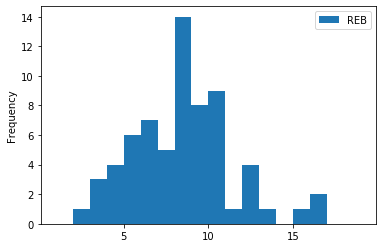

In [41]:
plot = plotData.plot.hist(bins = list(range(1,20)))
plot.locator_params(integer=True)

In [42]:
# Assists when 10 points or more
plotData = curPlayerData[curPlayerData['PTS'] >= 10]
plotData = plotData[['AST']]

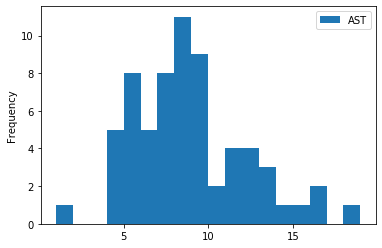

In [43]:
plot = plotData.plot.hist(bins = list(range(1,20)))
plot.locator_params(integer=True)

In [44]:
# rebounds when 10 points or more and 10 assists or more.
plotData = curPlayerData[(curPlayerData['PTS'] >= 10) & (curPlayerData['AST'] >= 10) ]
plotData = plotData[['REB']]

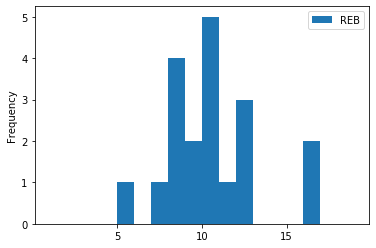

In [45]:
plot = plotData.plot.hist(bins = list(range(1,20)))
plot.locator_params(integer=True)

In [46]:
# Assists when 10 points or more and 10 rebounds or more.
plotData = curPlayerData[(curPlayerData['PTS'] >= 10) & (curPlayerData['REB'] >= 10) ]
plotData = plotData[['AST']]

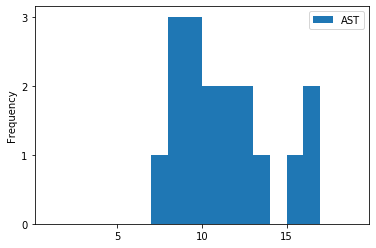

In [47]:
plot = plotData.plot.hist(bins = list(range(1,20)))
plot.locator_params(integer=True)

In [48]:
# Get data on all active players and see if there's clustering around certain points totals.
